# **Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from lime.lime_tabular import LimeTabularExplainer
import shap
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# **Load DataSet**

In [2]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# **Splitting Data**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Training Model**

In [4]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# **Accuracy Score**

In [5]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%


## **Explaining Model Predictions using LIME for Classification**

In [6]:
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    mode='classification'
)

i = 0
exp = explainer.explain_instance(X_test.iloc[i], model.predict_proba, num_features=4)
print(f"True sample class: {iris.target_names[y_test.iloc[i]]}")
print("Interpretation by LIME (Feature and its effect):")
for feature, weight in exp.as_list():
    print(f"  - {feature}: {weight:.3f}")

True sample class: virginica
Interpretation by LIME (Feature and its effect):
  - petal width (cm) > 1.90: -0.191
  - 4.35 < petal length (cm) <= 5.20: 0.131
  - 5.10 < sepal length (cm) <= 5.80: 0.032
  - sepal width (cm) <= 2.80: -0.019


/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

# **Model Interpretation with SHAP Summary Plot for Classification**

<Figure size 640x480 with 0 Axes>

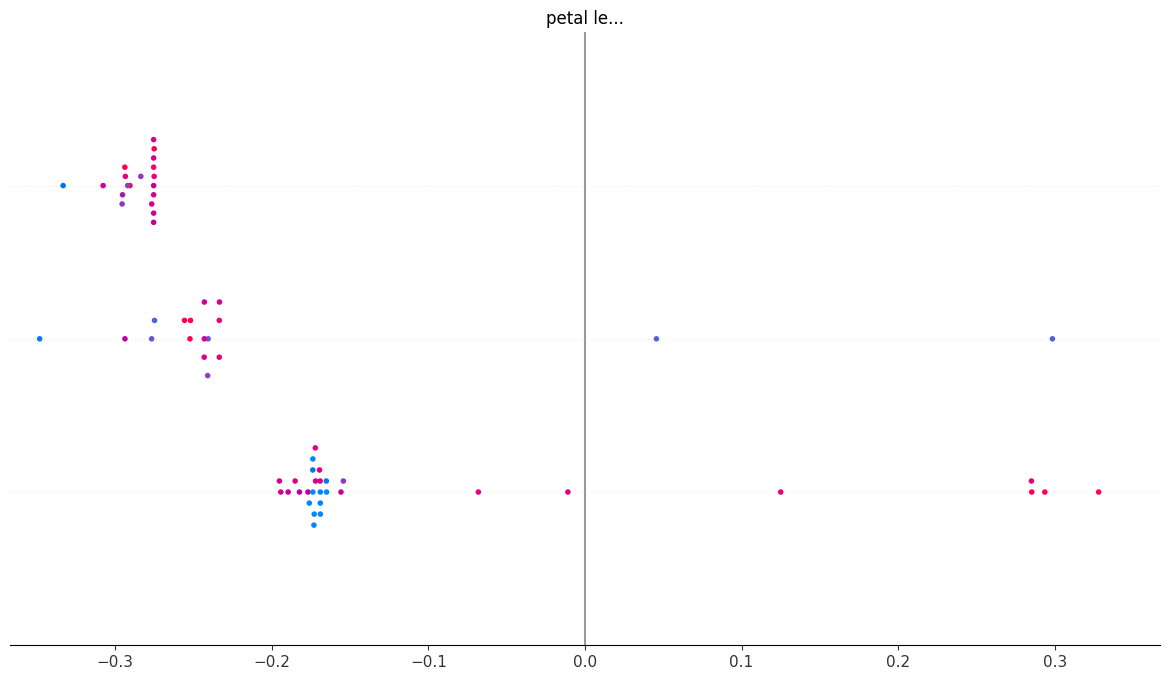

In [7]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names, class_names=iris.target_names)

# **Visualizing Partial Dependence for Selected Features**

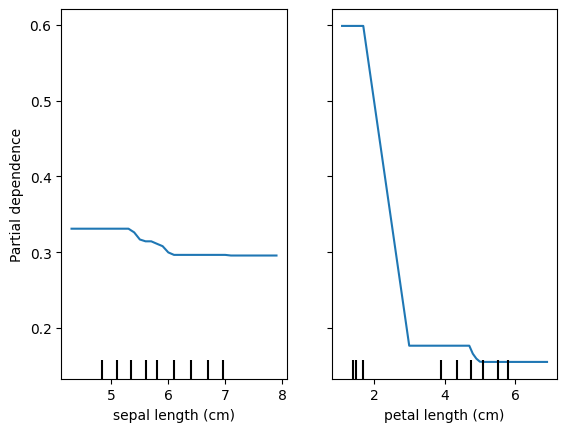

In [8]:
features = [0, 2]
PartialDependenceDisplay.from_estimator(model, X_train, features, target=0)
plt.show()

# **Generating a Counterfactual Example for Model Interpretation**

In [9]:
sample = X_test.iloc[0].values.reshape(1, -1)
pred_class = model.predict(sample)[0]

other_class_indices = np.where(y_train != pred_class)[0]
nearest_idx = None
min_dist = float('inf')
for idx in other_class_indices:
    dist = np.linalg.norm(X_train.iloc[idx].values - sample)
    if dist < min_dist:
        min_dist = dist
        nearest_idx = idx

counterfactual = X_train.iloc[nearest_idx]
print("Original sample: ", sample.flatten())
print("Original item: ", iris.target_names[pred_class])
print("Counter-sample (counter-interpretation): ", counterfactual.values)
print("The other category: ", iris.target_names[y_train[nearest_idx]])

Original sample:  [5.8 2.8 5.1 2.4]
Original item:  virginica
Counter-sample (counter-interpretation):  [5.9 3.2 4.8 1.8]
The other category:  virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
